In [1]:
import numpy as np
import pandas as pd

C:\Users\Нур\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Нур\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
df = pd.read_excel('spam_ru.xlsx')

In [6]:
df.sample(5)

,v1,v2
4945,0,Неправильный телефон! Этот телефон! Я отвечаю ...
1634,0,"Привет, мой маленький тусовщик! Я просто подум..."
5543,0,"Да, это просто обряд..."
1910,0,"Привет, красавица, ок? Я вроде как поссорился..."
3545,0,"Лол, ок, попробую отправить. Имейте в виду, чт..."


In [7]:
df

,v1,v2
0,1,"Как новое, но не за все деньги 😊 Техника тольк..."
1,1,"Успейте купить то, что давно хотели! Flip.kz В..."
2,0,"Иди до точки Джуронг, сумасшедший.. Доступно т..."
3,0,"Ладно, Лар... Шучу с тобой, они..."
4,1,Бесплатный вход в 2 еженедельных соревнованиях...
...,...,...
5569,1,"Это второй раз, когда мы пытаемся связаться с ..."
5570,0,М_б пойдет на эспланаду из дома?
5571,0,"Жаль, *был на это настроен. Итак... есть еще п..."
5572,0,"Парень немного пошутил, но я вел себя так, буд..."


In [122]:
df=0

In [9]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5574 non-null   int64 
 1   v2      5574 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [11]:
df.sample(5)

,v1,v2
1709,0,Раньше делал тест. Я ценю тебя. Завтра позвоню...
1266,0,посмотрю через полчаса
461,0,Переживать совсем другие чувства. Колебание ре...
403,0,"Дорогой, как дела, Чечи? Ты говорил с ней?"
4657,0,"Кей, я что-нибудь придумаю"


In [8]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3704,0,Как мой мальчик? Этим утром для меня не остало...
4584,1,Чтобы получить шанс выиграть еженедельный шопп...
2784,0,"Ну, сейчас мне придется встать и проверить сег..."
5223,0,"Джейн, детки, не идут на работу, чувствую себя..."
4427,0,Ты это что-то ел?


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,1,"Как новое, но не за все деньги 😊 Техника тольк..."
1,1,"Успейте купить то, что давно хотели! Flip.kz В..."
2,0,"Иди до точки Джуронг, сумасшедший.. Доступно т..."
3,0,"Ладно, Лар... Шучу с тобой, они..."
4,1,Бесплатный вход в 2 еженедельных соревнованиях...


In [12]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# check for duplicate values
df.duplicated().sum()

411

In [14]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5163, 2)

In [17]:
df.shape

(5163, 2)

In [18]:
df.head()

,target,text
0,1,"Как новое, но не за все деньги 😊 Техника тольк..."
1,1,"Успейте купить то, что давно хотели! Flip.kz В..."
2,0,"Иди до точки Джуронг, сумасшедший.. Доступно т..."
3,0,"Ладно, Лар... Шучу с тобой, они..."
4,1,Бесплатный вход в 2 еженедельных соревнованиях...


In [19]:
df['target'].value_counts()

target
0    4512
1     651
Name: count, dtype: int64

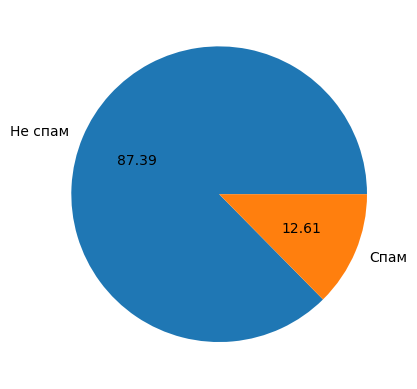

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['Не спам','Спам'],autopct="%0.2f")
plt.show()

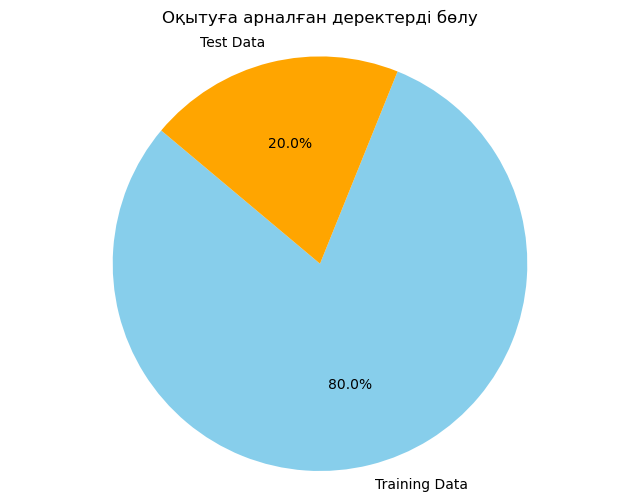

In [21]:
import matplotlib.pyplot as plt

# Data for plotting
labels = ['Training Data', 'Test Data']
sizes = [4458, 1114]
colors = ['skyblue', 'orange']

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Оқытуға арналған деректерді бөлу')
plt.show()

In [22]:
# Data is imbalanced

In [23]:
import nltk
nltk.download('punkt')

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Нур\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters'] = df['text'].apply(len)

C:\Users\Нур\AppData\Local\Temp\ipykernel_16188\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [26]:
df.head()

,target,text,num_characters
0,1,"Как новое, но не за все деньги 😊 Техника тольк...",356
1,1,"Успейте купить то, что давно хотели! Flip.kz В...",608
2,0,"Иди до точки Джуронг, сумасшедший.. Доступно т...",131
3,0,"Ладно, Лар... Шучу с тобой, они...",34
4,1,Бесплатный вход в 2 еженедельных соревнованиях...,265


In [27]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Нур\AppData\Local\Temp\ipykernel_16188\192676766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [28]:
df.head()

,target,text,num_characters,num_words
0,1,"Как новое, но не за все деньги 😊 Техника тольк...",356,73
1,1,"Успейте купить то, что давно хотели! Flip.kz В...",608,101
2,0,"Иди до точки Джуронг, сумасшедший.. Доступно т...",131,25
3,0,"Ладно, Лар... Шучу с тобой, они...",34,10
4,1,Бесплатный вход в 2 еженедельных соревнованиях...,265,42


In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Нур\AppData\Local\Temp\ipykernel_16188\4112269855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,1,"Как новое, но не за все деньги 😊 Техника тольк...",356,73,3
1,1,"Успейте купить то, что давно хотели! Flip.kz В...",608,101,8
2,0,"Иди до точки Джуронг, сумасшедший.. Доступно т...",131,25,1
3,0,"Ладно, Лар... Шучу с тобой, они...",34,10,1
4,1,Бесплатный вход в 2 еженедельных соревнованиях...,265,42,3


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5163.000000,5163.000000,5163.000000
mean,91.864807,18.988185,2.003099
std,71.628429,13.981489,1.439060
min,3.000000,1.000000,1.000000
25%,39.000000,9.000000,1.000000
50%,67.000000,15.000000,2.000000
75%,133.000000,27.000000,3.000000
max,983.000000,211.000000,28.000000


In [32]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4512.000000,4512.000000,4512.000000
mean,78.245789,17.145168,1.816711
std,63.365870,13.606073,1.327156
min,3.000000,1.000000,1.000000
25%,37.000000,8.000000,1.000000
50%,58.000000,13.000000,1.000000
75%,101.000000,22.000000,2.000000
max,983.000000,211.000000,28.000000


In [33]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,651.000000,651.000000,651.000000
mean,186.256528,31.761905,3.294931
std,51.656412,8.981185,1.519804
min,13.000000,2.000000,1.000000
25%,166.000000,28.000000,2.000000
50%,193.000000,33.000000,3.000000
75%,217.000000,37.000000,4.000000
max,608.000000,101.000000,8.000000


In [34]:
import seaborn as sns

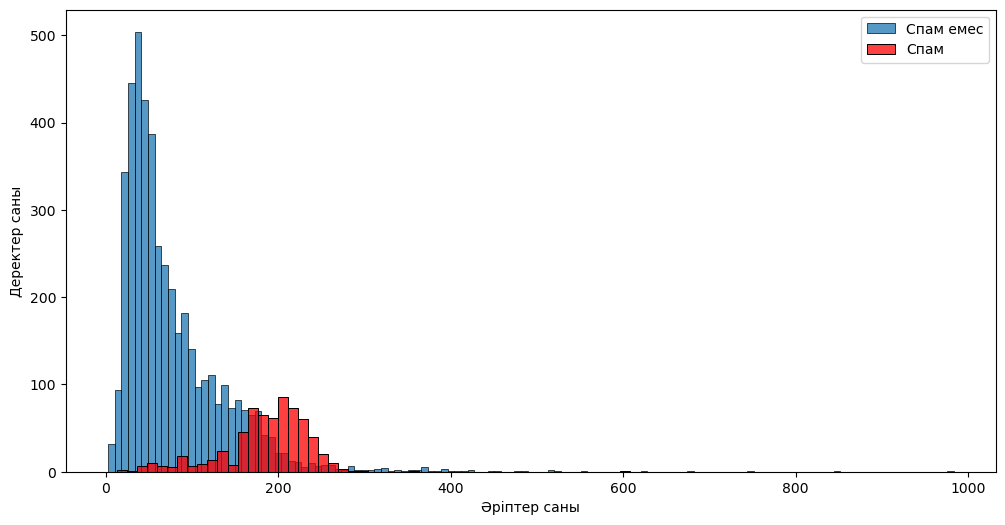

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')
plt.xlabel("Әріптер саны")
plt.ylabel("Деректер саны")
plt.legend(["Спам емес",'Спам'])

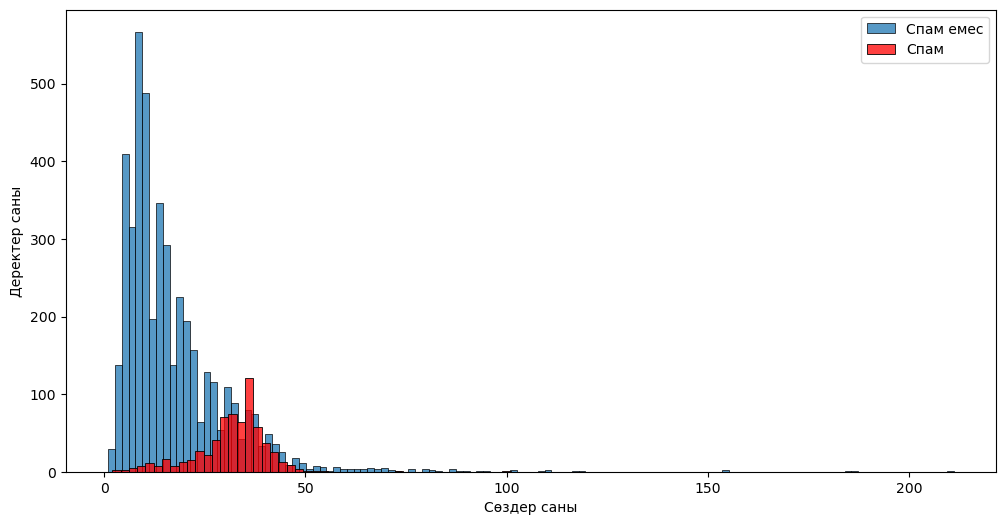

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')
plt.xlabel("Сөздер саны")
plt.ylabel("Деректер саны")
plt.legend(["Спам емес",'Спам'])

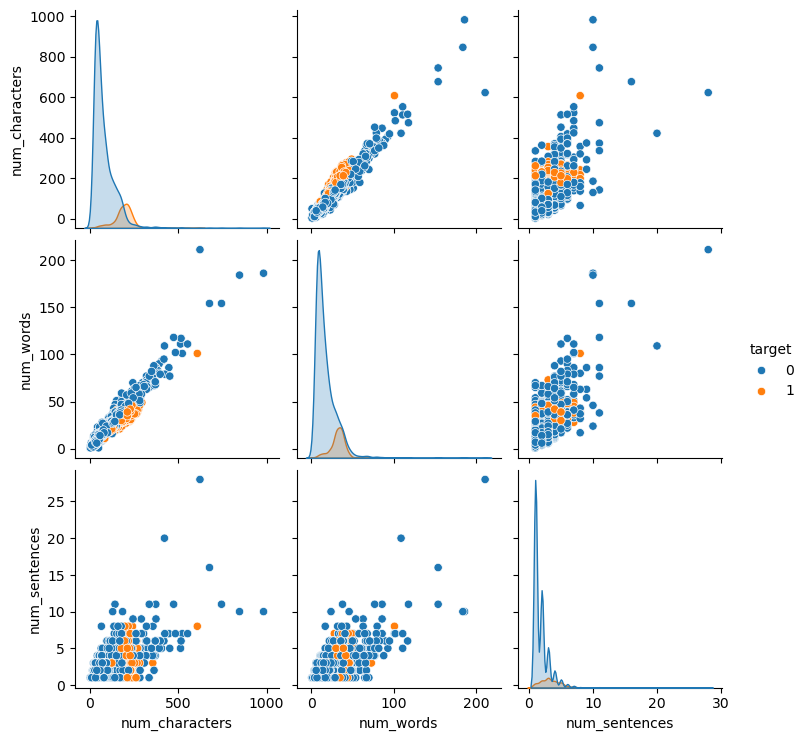

In [42]:
sns.pairplot(df,hue='target')

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [43]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")
stemmed_word = stemmer.stem(word)

print(stemmed_word)  # Выведет "бега"

NameError: name 'word' is not defined

In [44]:
stopwords.words('russian')

NameError: name 'stopwords' is not defined

In [45]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('russian'):
            y.append(i)
            
    text = y[:]

            
    return " ".join(y)

In [46]:
transform_text("Я скоро буду дома, и я больше не хочу говорить об этом сегодня вечером, Кей? Я достаточно поплакала сегодня.")

'скоро буду дома хочу говорить сегодня вечером кей достаточно поплакала сегодня'

In [47]:
df['text'][10]

'ПОБЕДИТЕЛЬ!! Как ценный клиент сети, вы были выбраны для получения призового вознаграждения в размере 900 фунтов стерлингов! Чтобы подать заявку, позвоните по телефону 09061701461. Код претензии KL341. Действует только 12 часов.'

In [48]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('вечером')

'вечером'

In [49]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\Нур\AppData\Local\Temp\ipykernel_16188\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


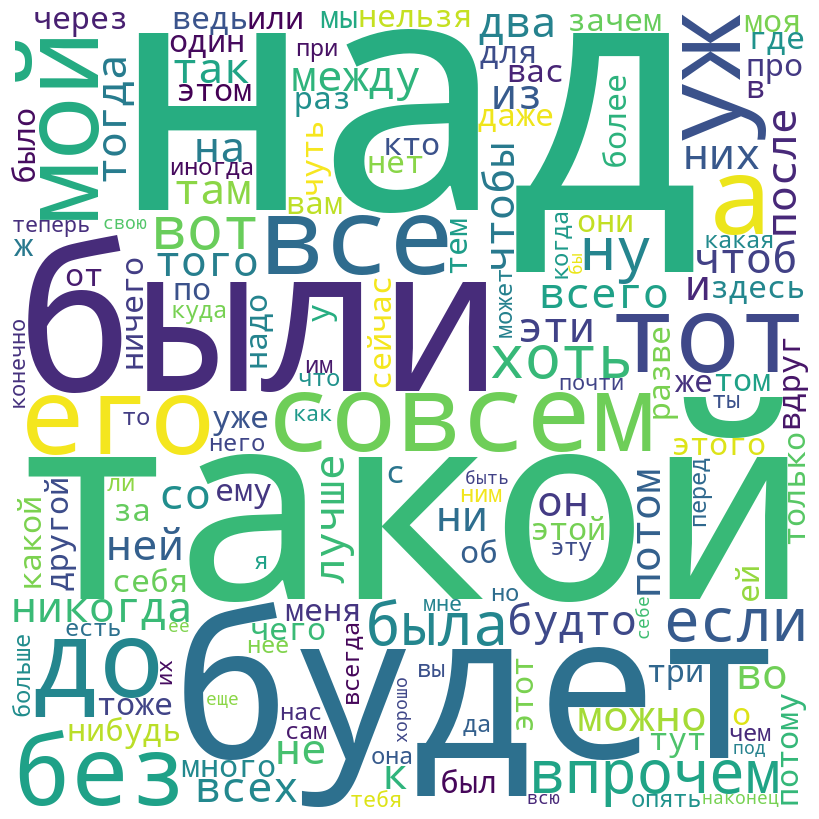

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Загрузка списка стоп-слов
stop_words = set(stopwords.words('russian'))  # Пример для русского языка

# Проверка, действительно ли список стоп-слов не пустой
if stop_words:
    # Создание строки из списка стоп-слов
    text = ' '.join(stop_words)

    # Создание облака слов
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

    # Визуализация облака слов
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.show()
else:
    print("Список стоп-слов пуст. Проверьте загрузку списка стоп-слов из NLTK.")


In [51]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,"Как новое, но не за все деньги 😊 Техника тольк...",356,73,3,новое деньги техника коробки продается находи ...
1,1,"Успейте купить то, что давно хотели! Flip.kz В...",608,101,8,успейте купить давно хотели всё flip скачивайт...
2,0,"Иди до точки Джуронг, сумасшедший.. Доступно т...",131,25,1,иди точки джуронг сумасшедший доступно bugis n...
3,0,"Ладно, Лар... Шучу с тобой, они...",34,10,1,ладно лар шучу тобой
4,1,Бесплатный вход в 2 еженедельных соревнованиях...,265,42,3,бесплатный вход 2 еженедельных соревнованиях п...


In [52]:
from wordcloud import WordCloud
wc = WordCloud(width=700,height=700,min_font_size=10,background_color='white')

In [53]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

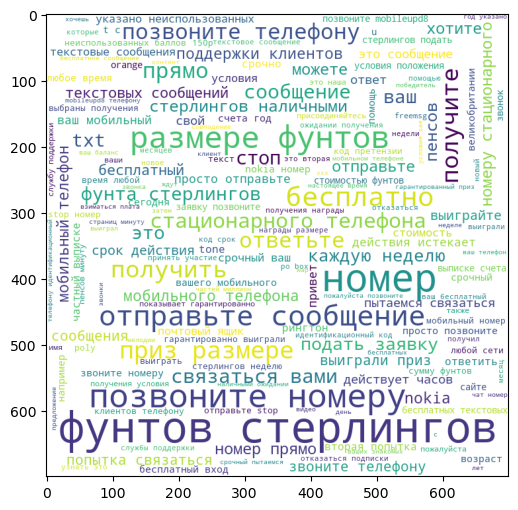

In [55]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [54]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

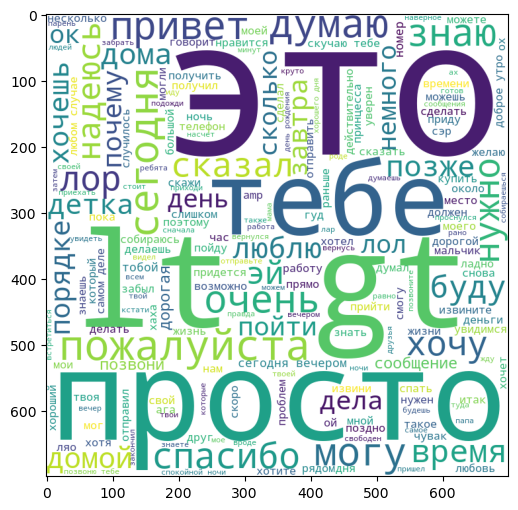

In [57]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [65]:
pd.DataFrame(X)

NameError: name 'X' is not defined

In [117]:
pd.DataFrame(y)

,0
0,1
1,1
2,0
3,0
4,1
...,...
5158,1
5159,0
5160,0
5161,0


In [56]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,"Как новое, но не за все деньги 😊 Техника тольк...",356,73,3,новое деньги техника коробки продается находи ...
1,1,"Успейте купить то, что давно хотели! Flip.kz В...",608,101,8,успейте купить давно хотели всё flip скачивайт...
2,0,"Иди до точки Джуронг, сумасшедший.. Доступно т...",131,25,1,иди точки джуронг сумасшедший доступно bugis n...
3,0,"Ладно, Лар... Шучу с тобой, они...",34,10,1,ладно лар шучу тобой
4,1,Бесплатный вход в 2 еженедельных соревнованиях...,265,42,3,бесплатный вход 2 еженедельных соревнованиях п...


In [57]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [58]:
len(spam_corpus)

12311

C:\Users\Нур\AppData\Local\Temp\ipykernel_16624\122821674.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=words_df, palette='Spectral')


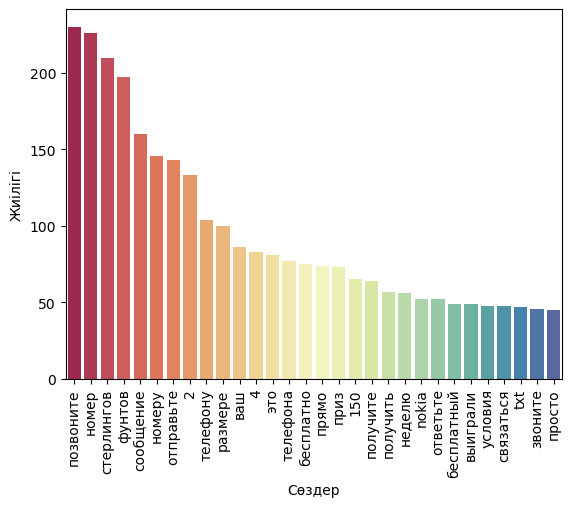

In [61]:
from collections import Counter
words_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Использование seaborn для построения графика
sns.barplot(x='Word', y='Frequency', data=words_df, palette='Spectral')
plt.xlabel("Сөздер")
plt.ylabel("Жиілігі")
plt.xticks(rotation='vertical')
plt.show()

In [60]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [61]:
len(ham_corpus)

33996

In [63]:
words_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])
sns.barplot(x='Word', y='Frequency', data=words_df, palette='Spectral')
plt.xlabel("Сөздер")
plt.ylabel("Жиілігі")
plt.xticks(rotation='vertical')
plt.show()

NameError: name 'Counter' is not defined

In [65]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,1,"Как новое, но не за все деньги 😊 Техника тольк...",356,73,3,новое деньги техника коробки продается находи ...
1,1,"Успейте купить то, что давно хотели! Flip.kz В...",608,101,8,успейте купить давно хотели всё flip скачивайт...
2,0,"Иди до точки Джуронг, сумасшедший.. Доступно т...",131,25,1,иди точки джуронг сумасшедший доступно bugis n...
3,0,"Ладно, Лар... Шучу с тобой, они...",34,10,1,ладно лар шучу тобой
4,1,Бесплатный вход в 2 еженедельных соревнованиях...,265,42,3,бесплатный вход 2 еженедельных соревнованиях п...


## 4. Model Building

In [67]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [68]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [69]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [70]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [71]:
import pandas as pd

# Получение списка слов
feature_names = tfidf.get_feature_names_out()

# Создание DataFrame
word_column_mapping = pd.DataFrame({'Сөз': feature_names, 'Индексі': range(len(feature_names))})

# Вывод таблицы
(word_column_mapping[240:])

,Сөз,Индексі
240,абиола,240
241,автобус,241
242,автобуса,242
243,автобусе,243
244,автобусной,244
...,...,...
2995,ян,2995
2996,января,2996
2997,яр,2997
2998,ящик,2998


In [72]:
X.shape

(5163, 3000)

In [82]:
pd.DataFrame(pd.DataFrame(X).iloc[0,:])

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
2995,0.0
2996,0.0
2997,0.0
2998,0.0


In [81]:
df.text[0]

'Как новое, но не за все деньги 😊 Техника только из коробки 📦 , а уже продается Находи свое >> OLX Кто-то не угадал с подарком, кто-то взял самую новую модель, а кто-то так и не разобрался, как им пользоваться. И теперь на OLX почти новая техника, но выгоднее, чем в магазине. Находи свое >> Присоединяйтесь к нашим сообществам и пользуйтесь приложением OLX'

In [79]:
y = df['target'].values

In [80]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

NameError: name 'train_test_split' is not defined

In [100]:
# tfidf --> MNB

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Инициализация моделей
svc = SVC(random_state=2)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(random_state=2)
lrc = LogisticRegression(random_state=2)
rfc = RandomForestClassifier(random_state=2)
xgb = XGBClassifier(random_state=2)

# Параметры для GridSearch
param_grid = {
    'SVC': {'kernel': ['linear', 'sigmoid'], 'gamma': [1e-3,  1.0], 'C': [0.1, 1]},
    'KN': {'n_neighbors': [3, 5, 7, 9]},
    'NB': {},  # MultinomialNB обычно имеет небольшое количество параметров для настройки
    'DT': {'max_depth': [3, 5, 7, 9], 
           'min_samples_split': [2, 4, 6],
           'max_features': ['auto', 'sqrt'],
           'min_samples_leaf': [1, 2, 4]},
    'LR': {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10], 'solver': ['liblinear']},
    'RF': {'n_estimators': [10, 50, 100], 
           'max_features': ['sqrt', 'log2'],
           'max_depth': [10, 20, 30, 40, 50 ], 
           'min_samples_leaf': [1, 2, 4], 
           'min_samples_split': [2, 5, 10],},
    'XGB': {'n_estimators': [30, 50, 100], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
}

# Словарь классификаторов
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'XGB': xgb
}


# Словарь для хранения лучших классификаторов
best_clfs = {}

accuracy_scores = []
precision_scores = []

# Обучение моделей с помощью Grid Search
print("Learning Started")
for name, clf in clfs.items():
    print("#",name)
    if param_grid[name]:
        grid_search = GridSearchCV(estimator=clf, param_grid=param_grid[name], scoring='accuracy', cv=5,n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_clf = grid_search.best_estimator_
    else:
        best_clf = clf
        best_clf.fit(X_train, y_train)

    best_clfs[name] = best_clf

    y_pred = best_clf.predict(X_test)
    current_accuracy = accuracy_score(y_test, y_pred)
    current_precision = precision_score(y_test, y_pred, average='macro')  # Использование average='macro' для мультиклассовой классификации

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    
    print(f"Лучшие параметры для {name}: {grid_search.best_params_ if param_grid[name] else 'N/A'}")
    print(f"Accuracy - {current_accuracy}")
    print(f"Precision - {current_precision}")

# Создание DataFrame для сравнения результатов
performance_df = pd.DataFrame({
    'Algorithm': best_clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)

print(performance_df)

Learning Started
# SVC
Лучшие параметры для SVC: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Accuracy - 0.9835430784123911
Precision - 0.9864255091103966
# KN
Лучшие параметры для KN: {'n_neighbors': 3}
Accuracy - 0.9283639883833494
Precision - 0.9627016129032258
# NB
Лучшие параметры для NB: N/A
Accuracy - 0.9845111326234269
Precision - 0.9870022946500658
# DT
Лучшие параметры для DT: {'max_depth': 9, 'min_samples_split': 2}
Accuracy - 0.968054211035818
Precision - 0.9386280828120722
# LR
Лучшие параметры для LR: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy - 0.9796708615682478
Precision - 0.984119308075418
# RF
Лучшие параметры для RF: {'max_features': 'sqrt', 'n_estimators': 100}
Accuracy - 0.9806389157792836
Precision - 0.9893390191897655
# XGB
Лучшие параметры для XGB: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Accuracy - 0.9767666989351403
Precision - 0.9690913416823481
  Algorithm  Accuracy  Precision
5        RF  0.980639   0.989339
2        NB  

In [108]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.95,0.94
1,KNN,0.93,0.91
2,Decision Tree,0.89,0.88
3,Random Forest,0.96,0.95
4,AdaBoost,0.92,0.91
5,XGBoost,0.94,0.93


C:\Users\Нур\AppData\Local\Temp\ipykernel_16624\1271084703.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Algorithm', data=performance_df, ax=ax[0], palette='viridis')
C:\Users\Нур\AppData\Local\Temp\ipykernel_16624\1271084703.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Precision', y='Algorithm', data=performance_df, ax=ax[1], palette='viridis')


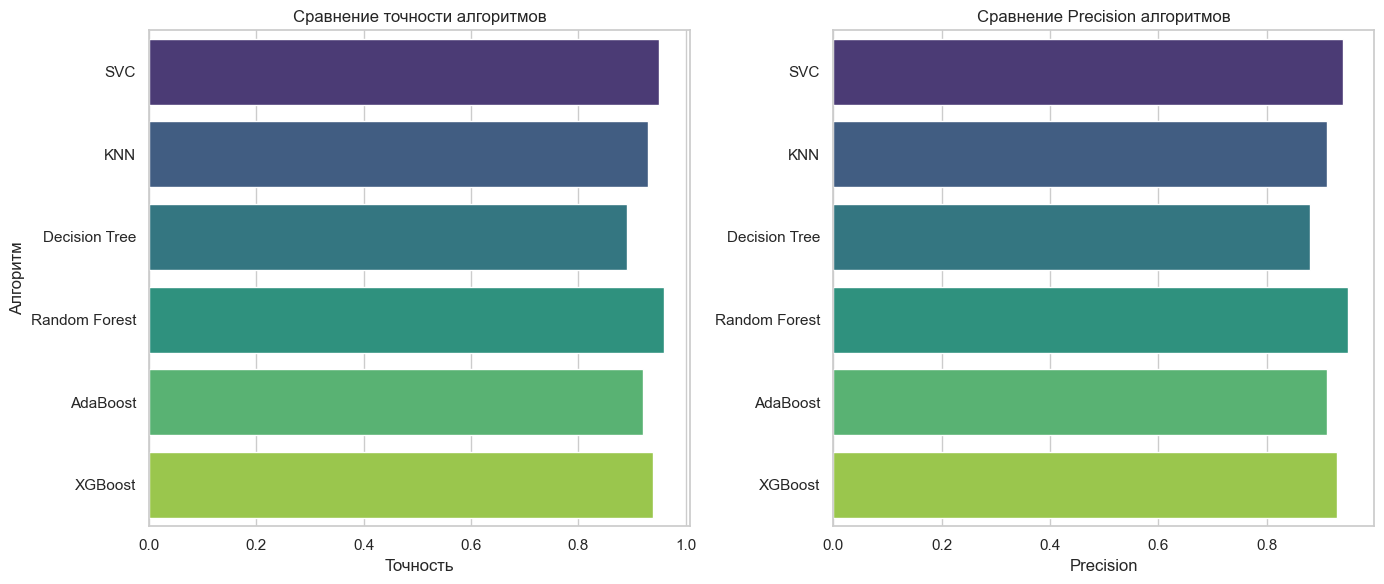

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Допустим, у нас есть DataFrame с результатами, назовем его performance_df
# Этот DataFrame содержит колонки 'Algorithm', 'Accuracy', 'Precision'

# Создаем DataFrame для примера
data = {
    'Algorithm': ['SVC', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost'],
    'Accuracy': [0.95, 0.93, 0.89, 0.96, 0.92, 0.94],
    'Precision': [0.94, 0.91, 0.88, 0.95, 0.91, 0.93]
}
performance_df = pd.DataFrame(data)

# Настройка внешнего вида с помощью Seaborn
sns.set(style="whitegrid")

# Создание графиков
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# График точности
sns.barplot(x='Accuracy', y='Algorithm', data=performance_df, ax=ax[0], palette='viridis')
ax[0].set_title('Сравнение точности алгоритмов')
ax[0].set_xlabel('Точность')
ax[0].set_ylabel('Алгоритм')

# График Precision
sns.barplot(x='Precision', y='Algorithm', data=performance_df, ax=ax[1], palette='viridis')
ax[1].set_title('Сравнение Precision алгоритмов')
ax[1].set_xlabel('Precision')
ax[1].set_ylabel('')

# Отображение графика
plt.tight_layout()
plt.show()

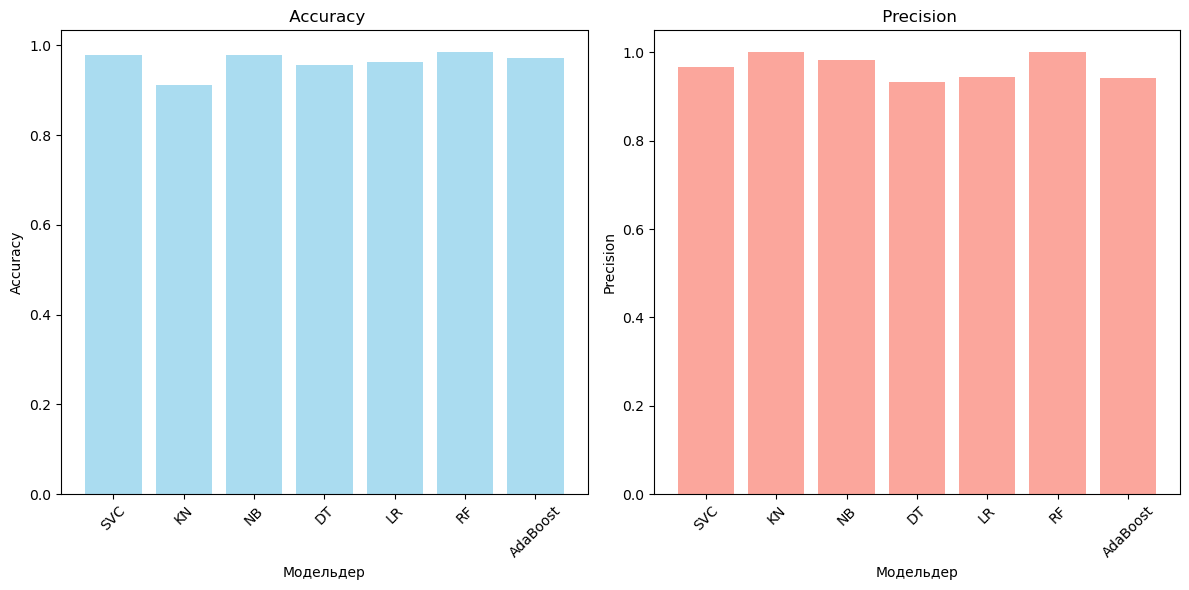

In [6]:
import matplotlib.pyplot as plt

# Названия моделей
models = ['SVC', 'KN', 'NB', 'DT', 'LR', 'RF', 'AdaBoost']

# Значения accuracy и precision
accuracy = [0.9796708615682478, 0.9119070667957405, 0.978702807357212, 0.957405614714424, 0.9641819941916747, 0.9845111326234269, 0.972894482090997]
precision = [0.9669421487603306, 1.0, 0.9827586206896551, 0.9326923076923077, 0.944954128440367, 1.0, 0.9416666666666667]

# Создание графиков
plt.figure(figsize=(12, 6))

# График для Accuracy
plt.subplot(1, 2, 1)
plt.bar(models, accuracy, color='skyblue', alpha=0.7)
plt.title(' Accuracy')
plt.xlabel('Модельдер')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

# График для Precision
plt.subplot(1, 2, 2)
plt.bar(models, precision, color='salmon', alpha=0.7)
plt.title(' Precision')
plt.xlabel('Модельдер')
plt.ylabel('Precision')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


SVC 0.97 0.96
KNN 0.91 1.0
NB 0.97 0.98
DT 0.95 0.93
LR 0.96 0.94
RF 0.98 1.0
AdaBoost 0.97 0.94
BgC 0.97 0.9
ETC 0.98 0.99
GBDT 0.96 0.98
xgb 0.97 0.94


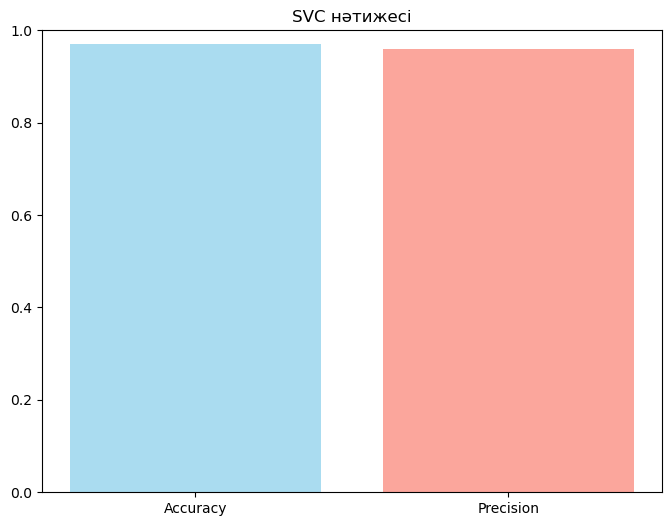

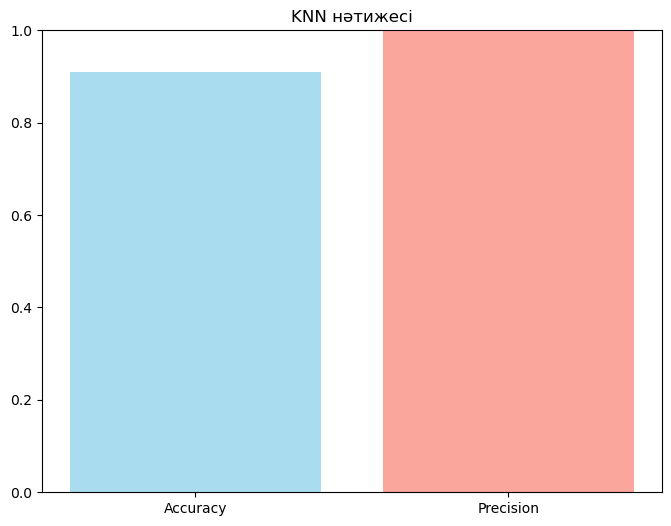

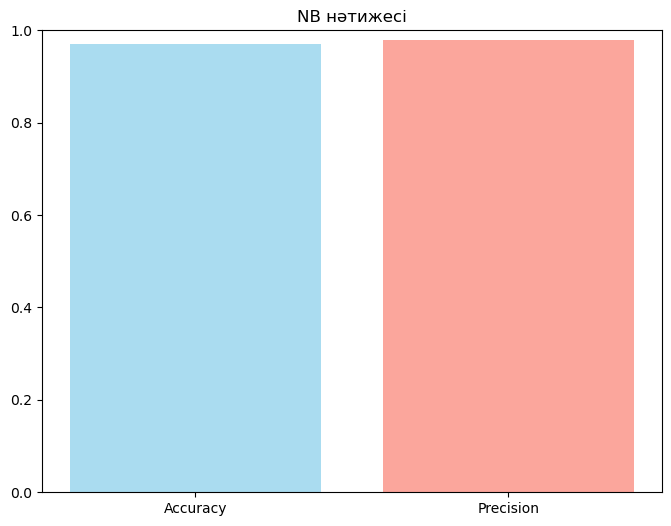

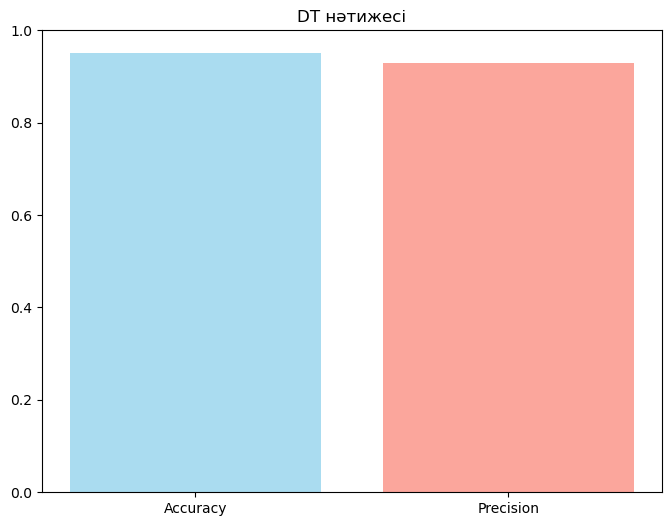

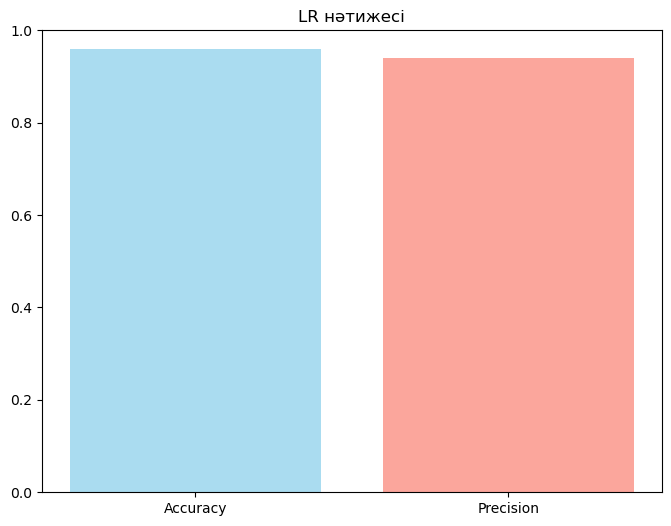

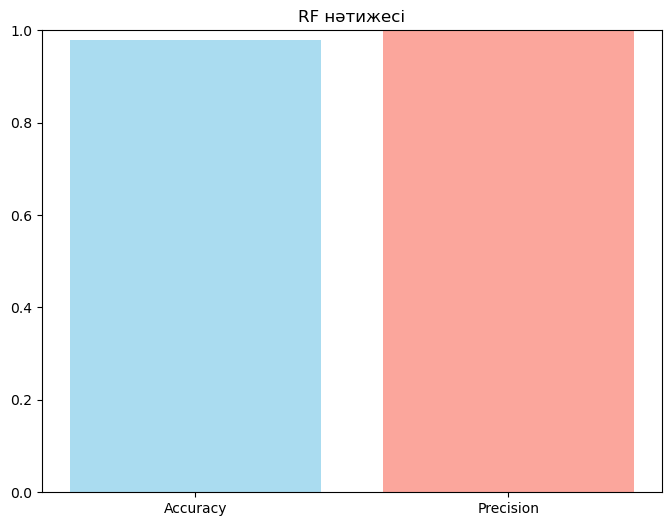

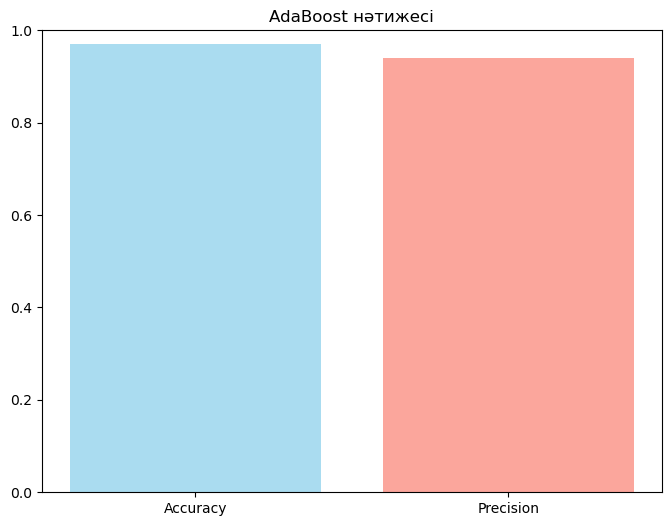

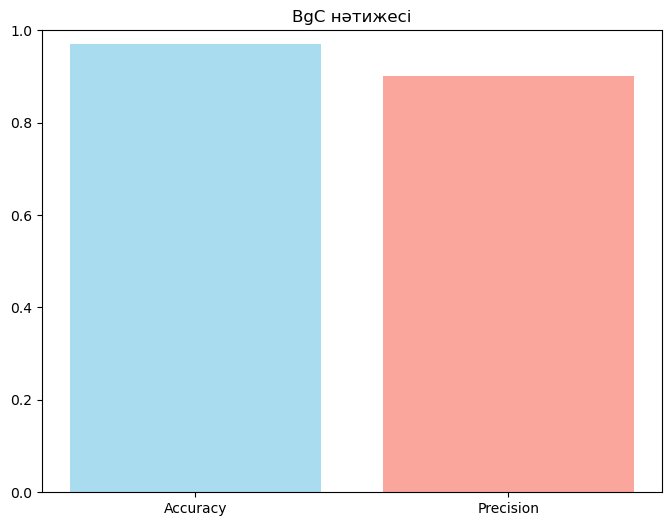

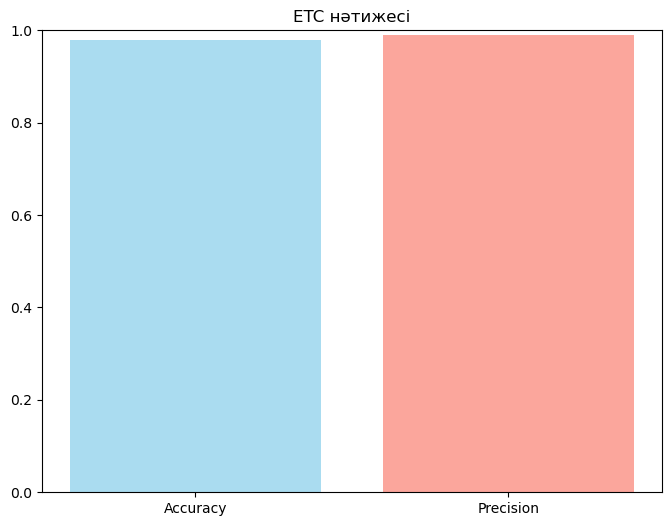

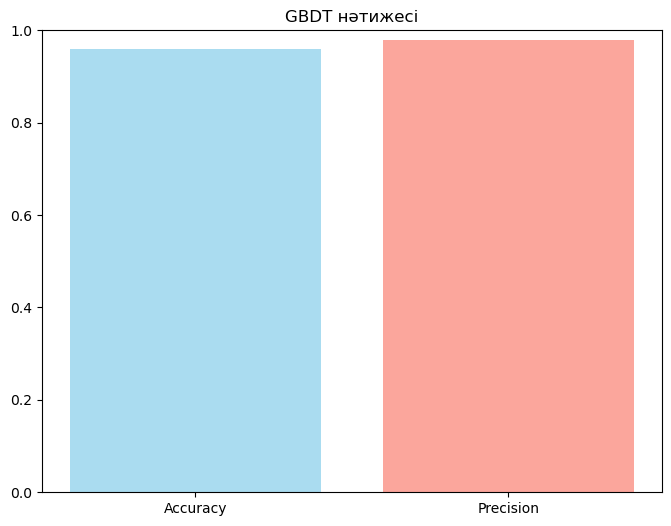

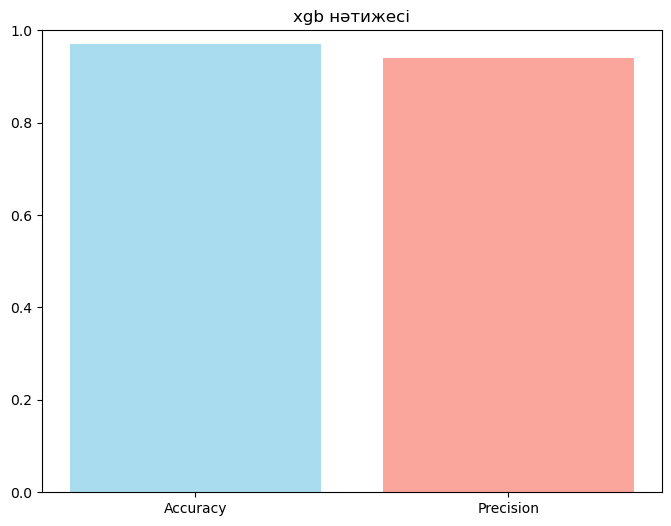

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Названия моделей
models = ['SVC', 'KNN', 'NB', 'DT', 'LR', 'RF', 'AdaBoost', 'BgC', 'ETC', 'GBDT', 'xgb']

# Значения accuracy и precision
accuracy = [0.97, 0.91, 0.97, 0.95, 0.96, 0.98, 0.97, 0.97, 0.98, 0.96, 0.97]
precision = [0.96, 1.0, 0.98, 0.93, 0.94, 1.0, 0.94, 0.90, 0.99, 0.98, 0.94]

for i in range(len(models)):
    print(models[i],accuracy[i],precision[i])

# Создание графиков для каждого алгоритма
for i in range(len(models)):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Добавление столбцов для accuracy и precision
    ax.bar(np.arange(2), [accuracy[i], precision[i]], color=['skyblue', 'salmon'], alpha=0.7)
    
    # Настройка осей и заголовка
    ax.set_xticks(np.arange(2))
    ax.set_xticklabels(['Accuracy', 'Precision'])
    ax.set_title(f'{models[i]} нәтижесі')
    ax.set_ylim(0, 1)  # Установка предела для оси Y
    
    plt.show()
